In [1]:
#importing
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset
dataset=pd.read_csv(r'C:\Users\Aditi\Downloads\house-price-prediction-master\house-price-prediction-master\kc_house_data.csv')

In [3]:
#Dimensions of the dataset
dataset.shape

(21613, 21)

# PRE-PROCESSING THE DATA

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [5]:
dataset.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,4.580302e+09,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,5.401822e+05
std,2.876566e+09,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.673622e+05
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04
25%,2.123049e+09,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,3.219500e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64


<AxesSubplot:>

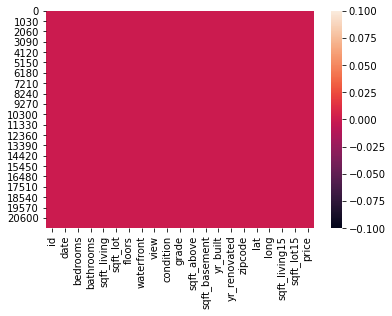

In [6]:
#null values
print(dataset.isnull().sum())
sns.heatmap(dataset.isnull())

clearly visible that we have no null values

In [7]:
#finding maximum and minimum value of every column in the dataset
for i in dataset.columns:
    print(i,"      ",dataset[i].min(),"      ",dataset[i].max())
    

id        1000102        9900000190
date        20140502T000000        20150527T000000
bedrooms        0        33
bathrooms        0.0        8.0
sqft_living        290        13540
sqft_lot        520        1651359
floors        1.0        3.5
waterfront        0        1
view        0        4
condition        1        5
grade        1        13
sqft_above        290        9410
sqft_basement        0        4820
yr_built        1900        2015
yr_renovated        0        2015
zipcode        98001        98199
lat        47.1559        47.7776
long        -122.519        -121.315
sqft_living15        399        6210
sqft_lot15        651        871200
price        75000.0        7700000.0


The value range of the columns differ widely. Hence we normalize the data.

In [8]:
def normalize (dataset):
    for i in range(0,dataset.shape[1]-1):        
        dataset[:,i] = ((dataset[:,i] - np.mean(dataset[:,i]))/np.std(dataset[:, i]))

# Data Visualtizations

The visualiztions have been attached in a separate tableau file. Kindly refer them for a clearer understanding.

In [9]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
labels=dataset['price']
dataset['date']=[1 if value==2014 else 0 for value in dataset.date]
df=dataset.drop(['id','price'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(df,labels,test_size=0.10,random_state=2)

In [12]:
reg.fit(x_train,y_train)

LinearRegression()

In [13]:
reg.score(x_test,y_test)

0.7320721056067926

The accuracy of the given model is 73.20%. To get a beeter accuracy we can implement the GRADIENT BOOSTING REGRESSION model

# Gradient Boosting Regressor

It is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [14]:
from sklearn import ensemble

In [15]:
df1=ensemble.GradientBoostingRegressor(n_estimators=800,max_depth=5,min_samples_split=2,learning_rate=0.1,loss='ls')

In [16]:
df1.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=800)

In [17]:
df1.score(x_test,y_test)

0.9201886247628297

# OLS model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
#OLS model
ols=LinearRegression()
ols.fit(x_train, y_train)

LinearRegression()

In [20]:
ols.fit(x_test,y_test)

LinearRegression()

In [21]:
ols.score(x_test,y_test)

0.7375358979138006

# Ridge Model

In [22]:
from sklearn.linear_model import Ridge

In [24]:
ridge = Ridge(alpha = 0.5)
ridge.fit(x_train, y_train)

Ridge(alpha=0.5)

In [25]:
ridge.fit(x_test,y_test)

Ridge(alpha=0.5)

In [26]:
ridge.score(x_test,y_test)

0.737518417068671

# Lasso Model

In [27]:
from sklearn.linear_model import Lasso

In [30]:
lasso=Lasso(alpha=0.01)
lasso.fit(x_train,y_train)

C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 360268741566626.06, tolerance: 260006754243.725
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [31]:
lasso.fit(x_test,y_test)

C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37742309020276.85, tolerance: 31621767546.958126
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [32]:
lasso.score(x_test,y_test)

0.7375358979136036

# BayesianRidge Model

In [34]:
from sklearn.linear_model import BayesianRidge

In [35]:
bayesian=BayesianRidge()
bayesian.fit(x_train,y_train)

BayesianRidge()

In [36]:
bayesian.fit(x_test,y_test)

BayesianRidge()

In [37]:
bayesian.score(x_test,y_test)

0.7374297007132196

# ElasticNet Model

In [38]:
from sklearn.linear_model import ElasticNet

In [41]:
elastic=ElasticNet(alpha=0.01)
elastic.fit(x_train,y_train)

C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 421061559827032.75, tolerance: 260006754243.725
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.01)

In [42]:
elastic.fit(x_test,y_test)

C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43629812445837.695, tolerance: 31621767546.958126
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.01)

In [43]:
elastic.score(x_test,y_test)

0.7337479364308181

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators = 10, random_state = 0)

In [45]:
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [46]:
rf.fit(x_test,y_test)

RandomForestRegressor(n_estimators=10, random_state=0)

In [47]:
rf.score(x_test,y_test)

0.9674351393392403

# SVM

In [48]:
from sklearn.svm import SVR

In [49]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)

SVR()

In [51]:
svr.fit(x_test,y_test)

SVR()

In [52]:
svr.score(x_test,y_test)

-0.06762386041031032

From the above models, it is evident that the best score is achieved using random forest model.
Hence for this dataset Random Forest Regressor will be used. 